## Unsupervised Learning Capstone: Bank Customer Segmentation 

Data Context: 
The original dataset is called the German Credit Risk. The dataset was prepared by Professor Hofmann of University of California, Irvine. The dataset has every customer labeled as Good Risk or Bad Risk according to the set of attributes. 

### Overview 

    Section 1: Prepare Data
        Import Modules and Libraries 
        Import Data 
        Clean Data
        Encode Data
        Exploratory Data Analysis 
    Section 2: Prepare Data for Cluster Methods
        Import Modules and Libraires 
        Standardize Data 
        Determine Best Number of Clusters 
        K-means 
        Hierarichical 
        DBSCAN 
    Section 3: Perform Dimensionality Reducation on Cluster Methods 
        Umap 
            K-means 
            Hierarichical
            DBSCAN
        t-SNE 
            K-means 
            Hierarichical
            DBSCAN
        PCA 
            K-means 
            Hierarichical
            DBSCAN
        Cluster and Dimensionality Reduction Comparison 
    Section 4: Test Chosen Model 
        Bring in Target variable
        Train and Test Split Data
        Standardize Data 
        Test Model 
        


In [40]:
#about the data, the problem, the purpose of project and a content

### Import Modules and Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import seaborn as sns
import keras
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

### Import Data

In [42]:
df = pd.read_csv(r"/Users/Charles/bank_customer_segmentation (1).csv")

### Clean Data

In [43]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [44]:
df.shape

(1000, 10)

In [45]:
#look for nan values
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [46]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [47]:
df['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [48]:
df['Purpose'].nunique()

8

Looks like there are 183 and 394 null values in Saving Accounts and Checking Accounts, respectively. However, for each of features, they have only 3-4 unique values. This means that I could use mean or mode to replace the missing values. 

I will use fillna mode string for both columns.

In [49]:
df['Saving accounts'].mode()

0    little
dtype: object

In [50]:
df['Checking account'].mode()

0    little
dtype: object

In [51]:
df['Saving accounts'].fillna('little', inplace=True)
df['Checking account'].fillna('little', inplace=True)

In [52]:
#look for nan values
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


The data consists of 2 different data types: Object and int64.
For consistency, turn the objects into integers.

In [54]:
#lets start by checking for all unique values that need to be replaced
pd.unique(df[['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']].values.ravel('K'))


array(['male', 'female', 'own', 'free', 'rent', 'little', 'quite rich',
       'rich', 'moderate', 'radio/TV', 'education', 'furniture/equipment',
       'car', 'business', 'domestic appliances', 'repairs',
       'vacation/others'], dtype=object)

In [55]:
df['Housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

### Encode categorical data for easier use 

In [56]:
df['Saving accounts'].replace({"little":1, "quite rich":2, "rich":3, "moderate":4}, inplace=True)
df['Checking account'].replace({"little":1, "rich":2, "moderate":3}, inplace=True)
df['Housing'].replace({"own":1, "free":2, "rent":3}, inplace=True)
df['Purpose'].replace({"radio/TV": 1, "education":2, "furniture/equipment":3, "vacation/others":4, "car": 5, "business":6, "domestic appliances":7, "repairs":8}, inplace=True)
df['Sex'].replace({"male":1, "female":2}, inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Unnamed: 0        1000 non-null   int64
 1   Age               1000 non-null   int64
 2   Sex               1000 non-null   int64
 3   Job               1000 non-null   int64
 4   Housing           1000 non-null   int64
 5   Saving accounts   1000 non-null   int64
 6   Checking account  1000 non-null   int64
 7   Credit amount     1000 non-null   int64
 8   Duration          1000 non-null   int64
 9   Purpose           1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


In [58]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,1,2,1,1,1,1169,6,1
1,1,22,2,2,1,1,3,5951,48,1
2,2,49,1,1,1,1,1,2096,12,2
3,3,45,1,2,2,1,1,7882,42,3
4,4,53,1,2,2,1,1,4870,24,5
...,...,...,...,...,...,...,...,...,...,...
995,995,31,2,1,1,1,1,1736,12,3
996,996,40,1,3,1,1,1,3857,30,5
997,997,38,1,2,1,1,1,804,12,1
998,998,23,1,2,2,1,1,1845,45,1


In [59]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)

Everything is in integer data type now. Let's move on to Exploratory Data Analysis.

### Exploratory Data Analysis

In [60]:
#correlation heatmap

In [61]:
corrmat_df = df.corr()

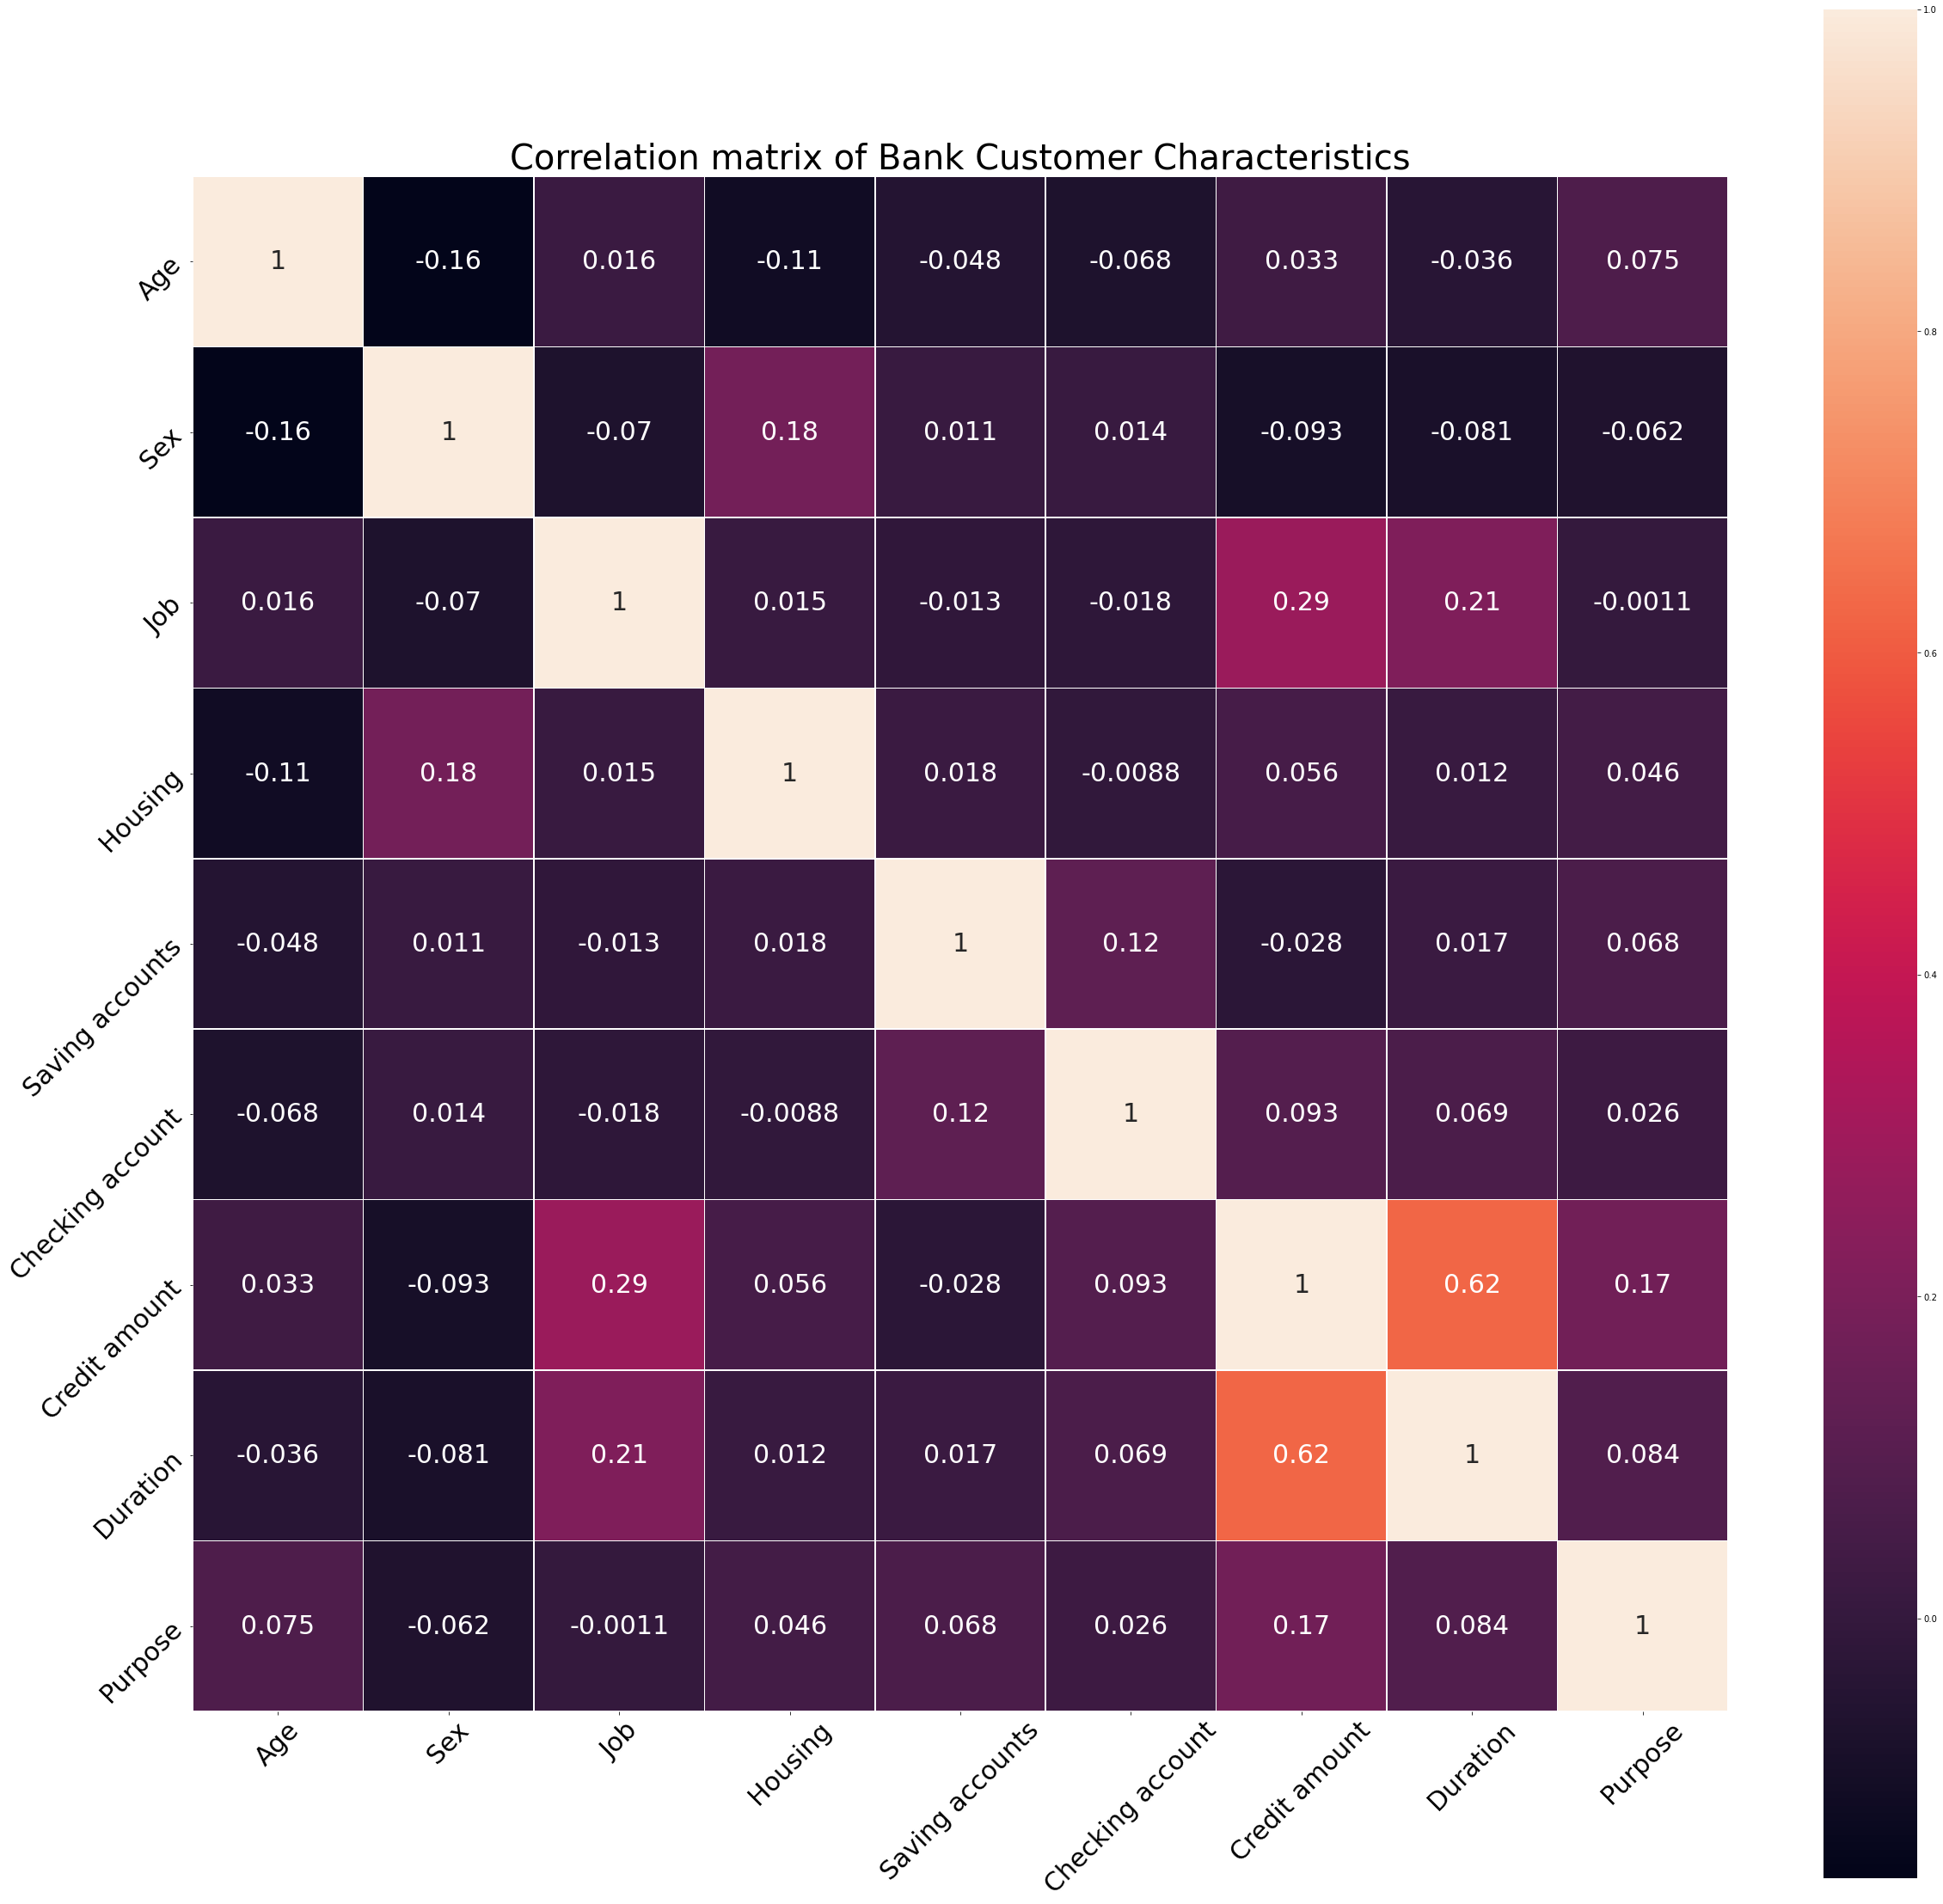

In [62]:
plt.figure(figsize=(40,40))

plt.subplot(1,1,1)
res = sns.heatmap(corrmat_df, square=True, annot=True, linewidths=.5, annot_kws={"size": 30})
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 30, rotation=45)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 30, rotation=45)
plt.title("Correlation matrix of Bank Customer Characteristics", fontsize=40)

plt.show()

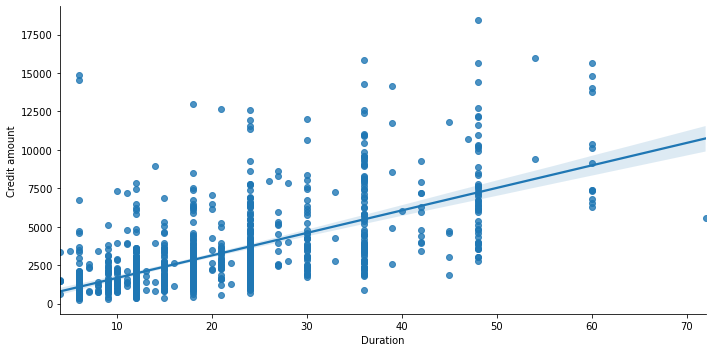

In [63]:
sns.lmplot(x="Duration",y="Credit amount", data=df, palette="Set1", aspect=2)
plt.show()

Looks like credit card and duration are highly correlated at 62%. This can be due to the fact that having a card card elongates your time with a bank because of payments and/or credit score building.

In [64]:
#histogram 

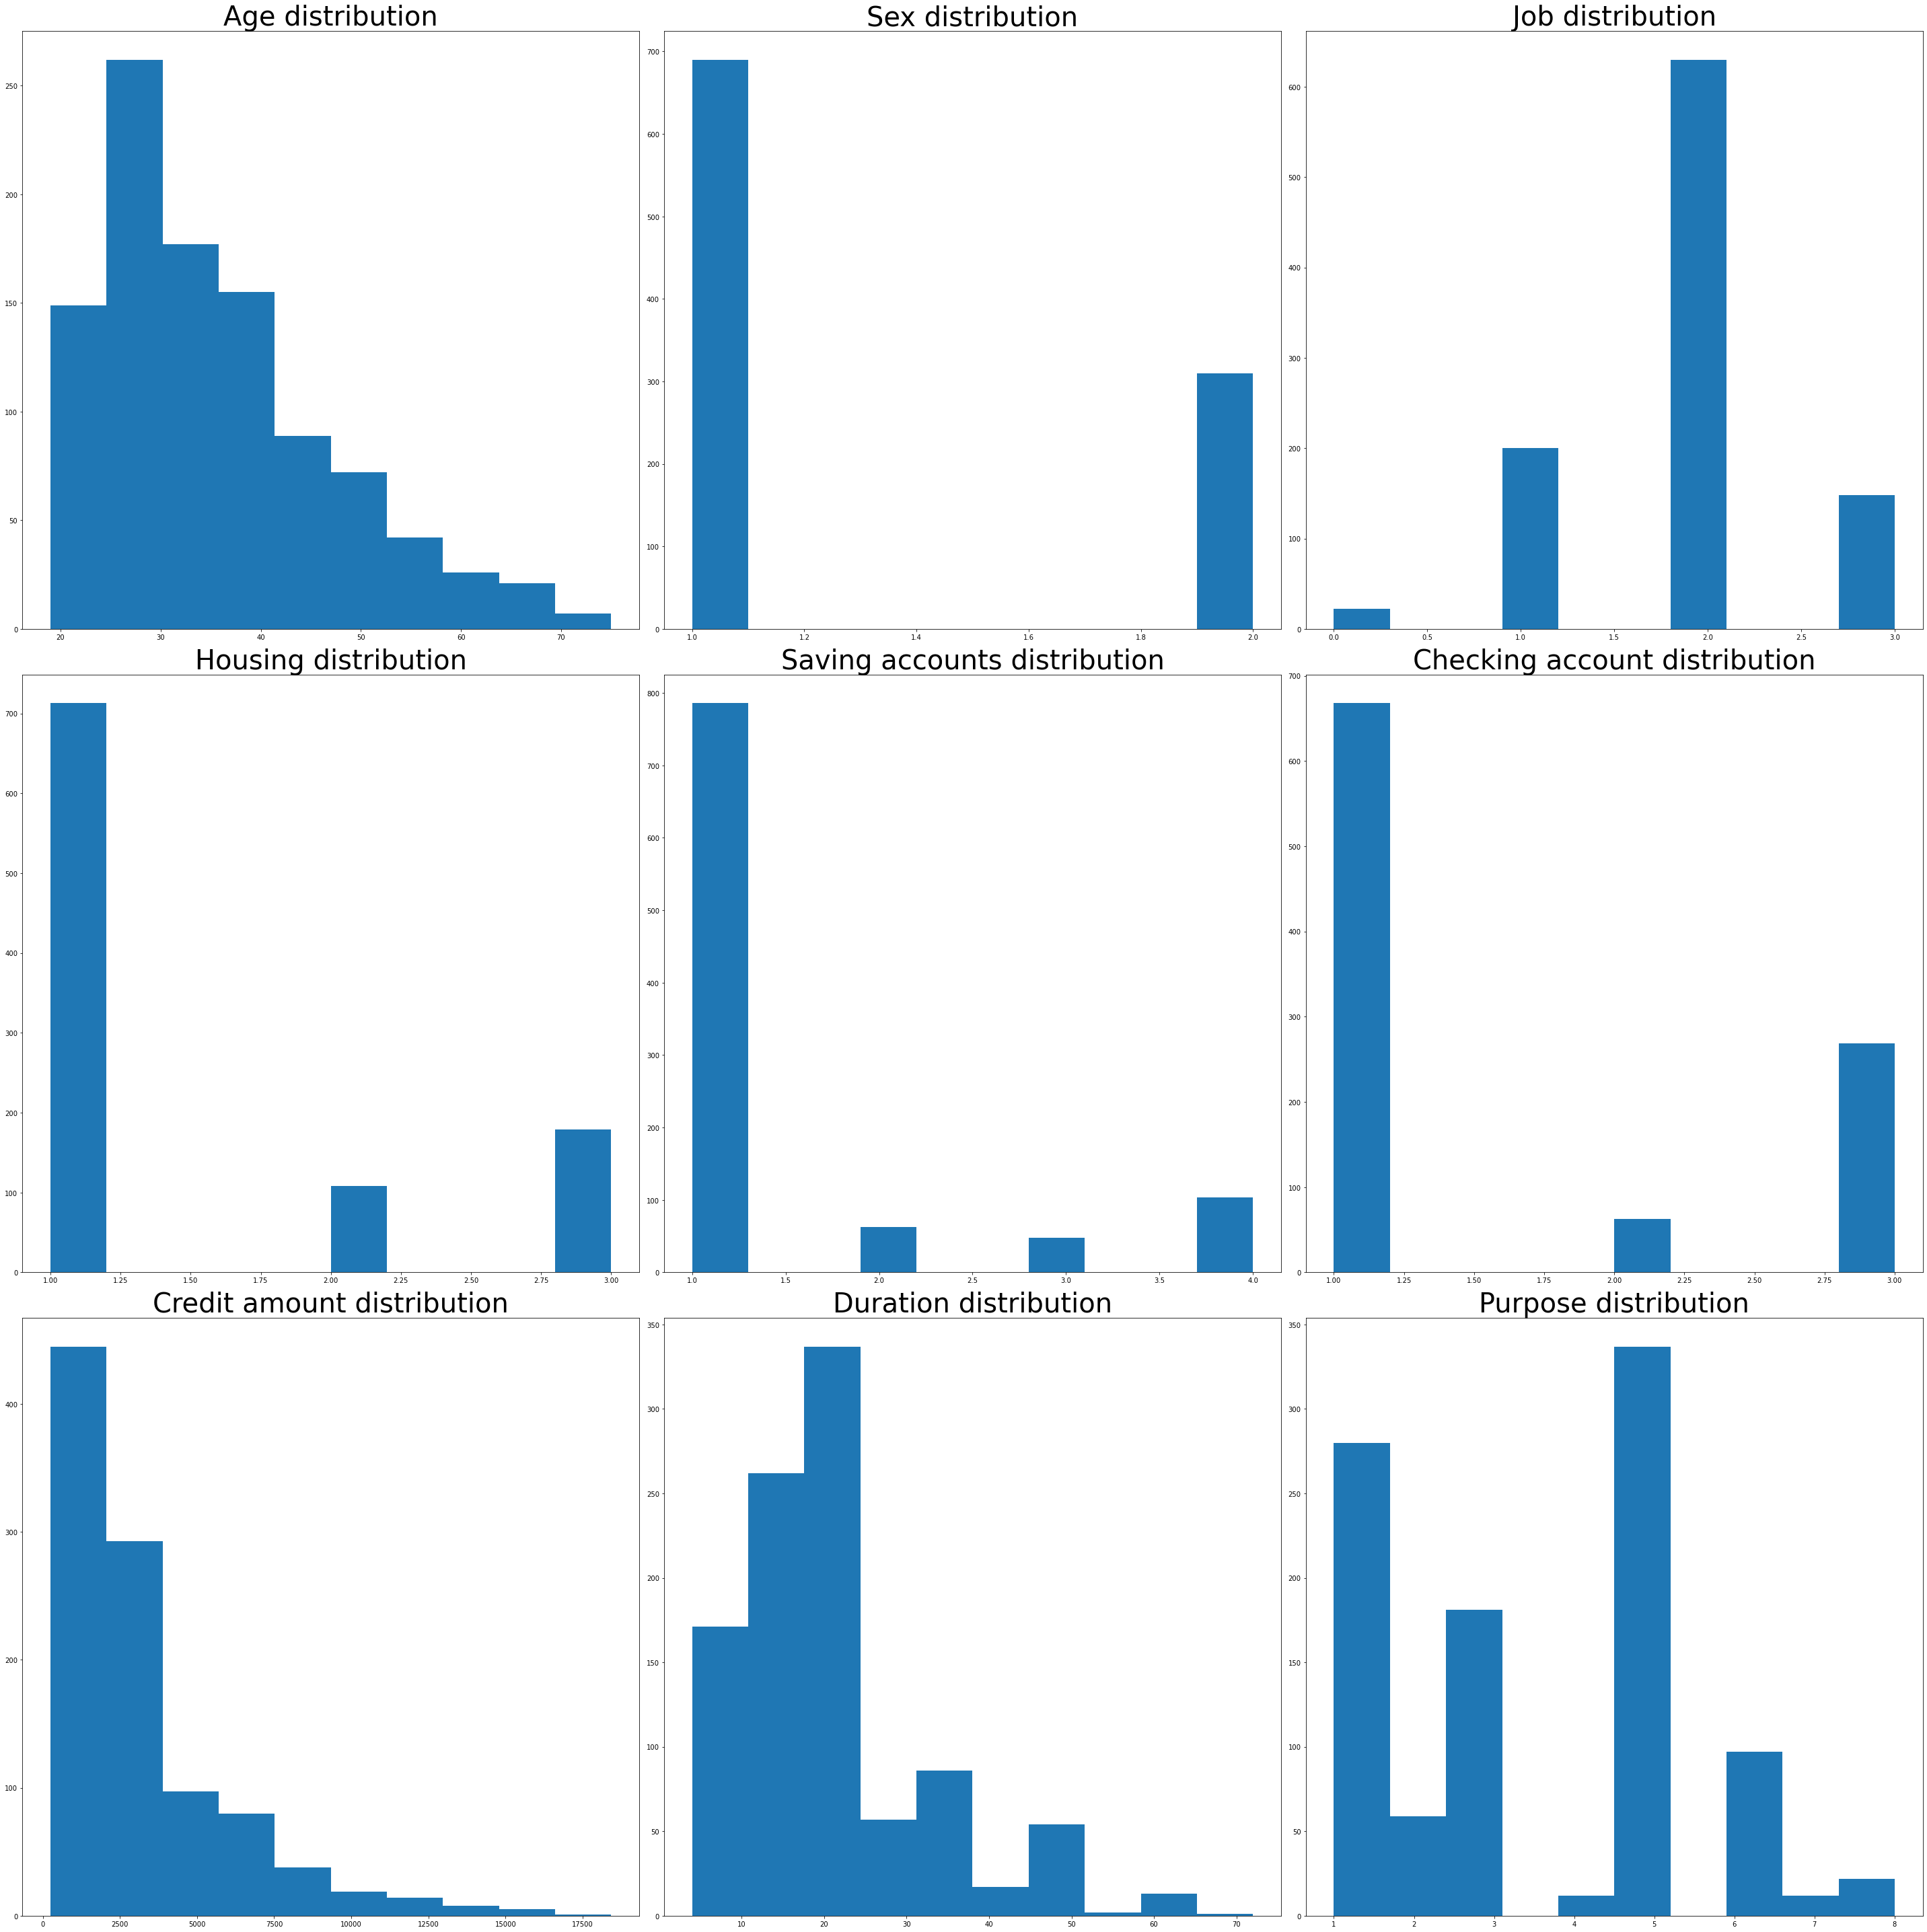

In [65]:
plt.figure(figsize=(40,40))
num=0
for i in df.columns:
    num+=1
    plt.subplot(3,3, num)
    plt.tight_layout()
    plt.hist(df[str(i)])
    plt.title((i+ ' distribution'), loc='center', fontsize=40, fontweight=0)

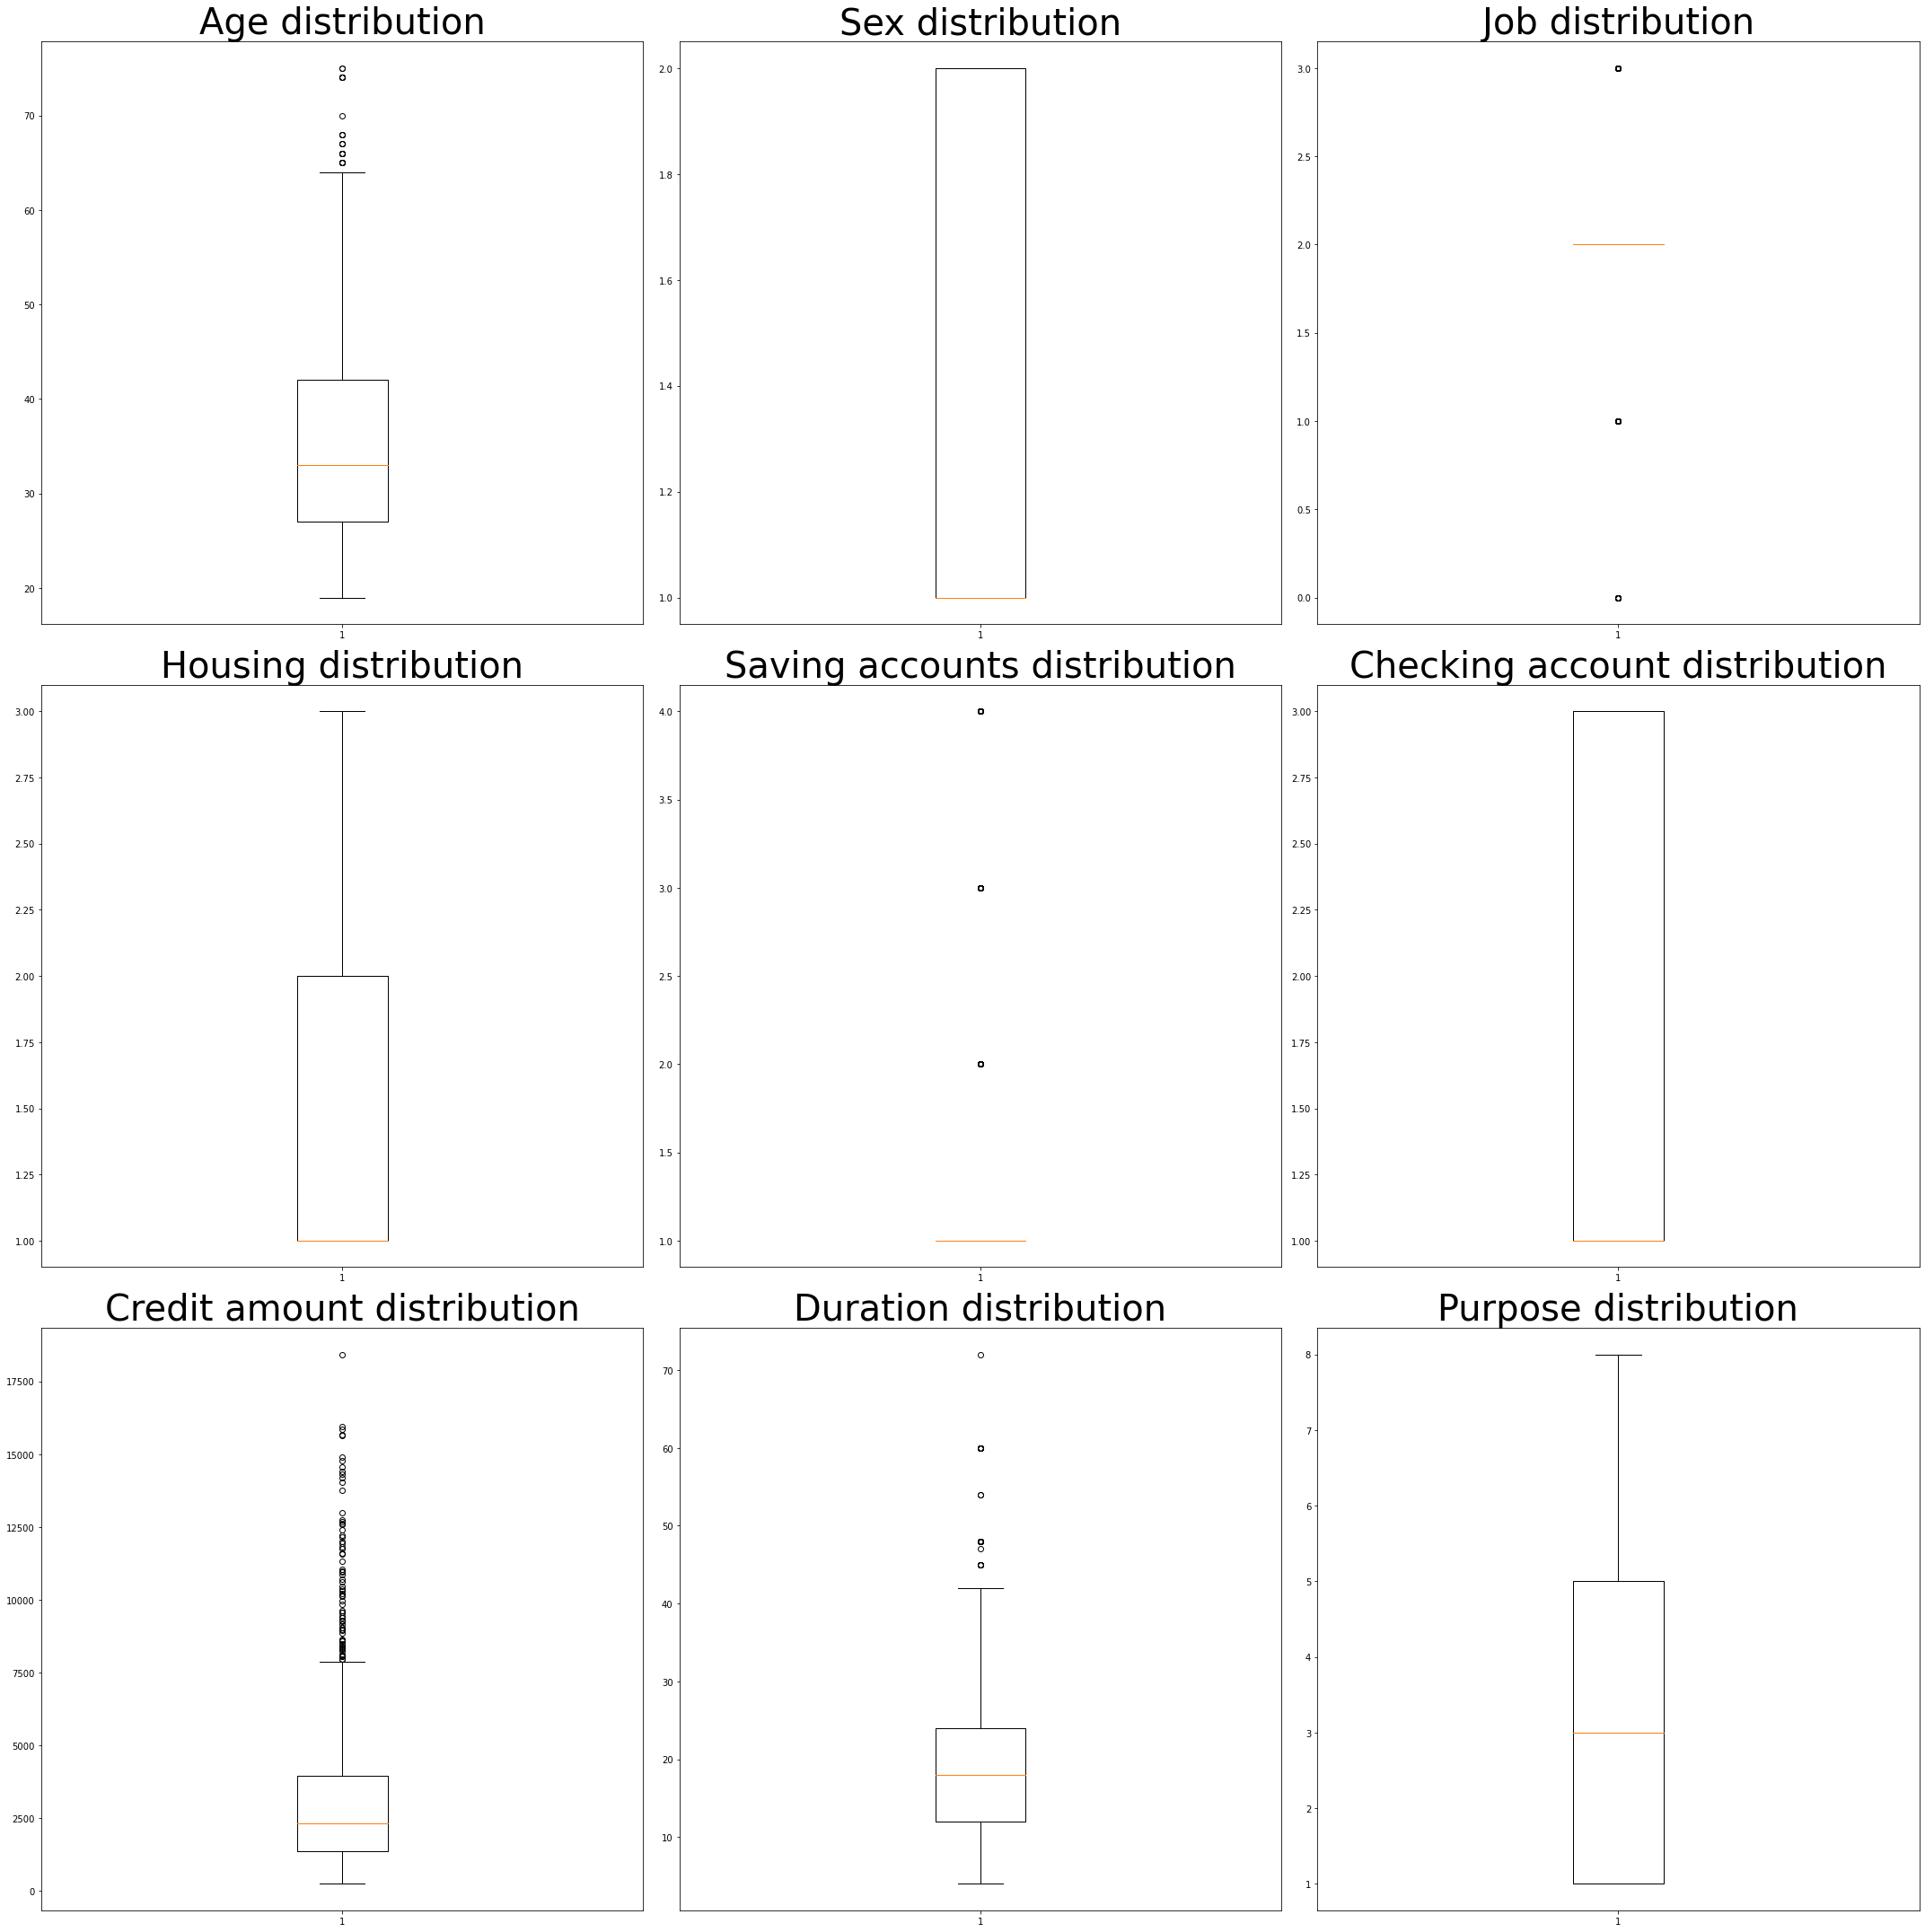

In [66]:
plt.figure(figsize=(30,30))
num=0
for i in df.columns:
    num+=1
    plt.subplot(3,3, num)
    plt.tight_layout()
    plt.boxplot(df[str(i)])
    plt.title((i+ ' distribution'), loc='center', fontsize=40, fontweight=0)

In [67]:
df.describe()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.310000,1.904000,1.466000,1.468000,1.60100,3271.258000,20.903000,3.516000
std,11.375469,0.462725,0.653614,0.779392,0.981804,0.88237,2822.736876,12.058814,1.972723
min,19.000000,1.000000,0.000000,1.000000,1.000000,1.00000,250.000000,4.000000,1.000000
25%,27.000000,1.000000,2.000000,1.000000,1.000000,1.00000,1365.500000,12.000000,1.000000
50%,33.000000,1.000000,2.000000,1.000000,1.000000,1.00000,2319.500000,18.000000,3.000000
75%,42.000000,2.000000,2.000000,2.000000,1.000000,3.00000,3972.250000,24.000000,5.000000
max,75.000000,2.000000,3.000000,3.000000,4.000000,3.00000,18424.000000,72.000000,8.000000


Based on the Boxplot and Bar graphs we know the following: 

    +Age: The avg customer is around 30, and a handful who are above 65
    +Sex: The avg customer is male 
    +Job: The avg customer has a job 
    +Housing: The avg customer owns their house
    +Savings Account: The majority of the customer's saving account is little 
    +Checking Account: The avg customer's checking account is little
    +Credit Card Amount: The avg customer has less than $2,5000 in credit card amount 
    +Duration: The avg customer holds their bank account for less than 20 years
    +Purpose: The most common purpose for a bank account(s) is to purchase furniture 

### Cluster customers information

In [68]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import datasets, metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn import mixture
from sklearn.neighbors import NearestNeighbors
import umap
import scipy.cluster.hierarchy as shc 
from sklearn.cluster import DBSCAN

### Standarize the features

In [69]:
#must normalize or standarize data 
#Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(df)

### Determine best number of clusters using the Elbow Method and Silhoutte Scores

Text(0.5, 1.0, 'Elbow method for optimal K')

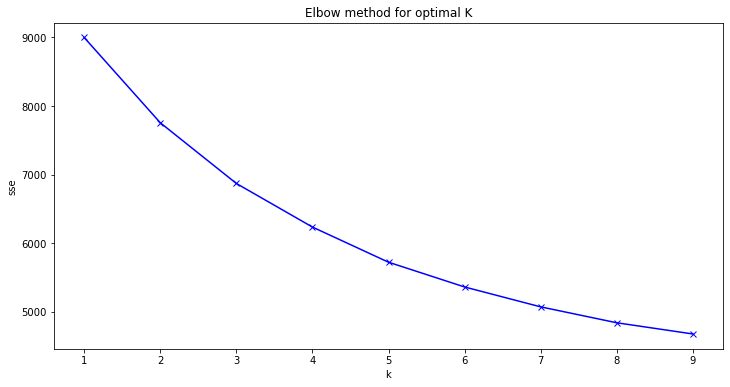

In [70]:
#Elbow method
sse = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_std)
    sse.append(km.inertia_)
    
plt.figure(figsize=(12,6))
plt.plot(K, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('sse')
plt.title('Elbow method for optimal K')

In [71]:
#silhoutte avg scores 
list =[]
#start the cluster range from 2
range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    cluster_n = KMeans(n_clusters=n_clusters, random_state=123)
    cluster_labels = cluster_n.fit_predict(X_std)
    silhouette_avg = metrics.silhouette_score(X_std, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    list.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.17170183476551779
For n_clusters = 3 The average silhouette_score is : 0.15793312914855595
For n_clusters = 4 The average silhouette_score is : 0.16830733040271134
For n_clusters = 5 The average silhouette_score is : 0.15003265316105274
For n_clusters = 6 The average silhouette_score is : 0.15312252499812998
For n_clusters = 7 The average silhouette_score is : 0.1538023749725789
For n_clusters = 8 The average silhouette_score is : 0.14166720484272669
For n_clusters = 9 The average silhouette_score is : 0.14961255969892887


The Elbow Method doesn't show a clear bend, one can say it bends around 2 or 3. The Silhouette Scores shoe that 2 clusters produce the highest score. I will go with 2.

### K-Means

In [72]:
k_means = KMeans(n_clusters=2, random_state=123)
kmeans_y = k_means.fit_predict(X_std)

In [73]:
print("The silhouette score of the K-means solution: {}".format(metrics.silhouette_score(X_std, kmeans_y, metric='euclidean')))

The silhouette score of the K-means solution: 0.17170183476551779


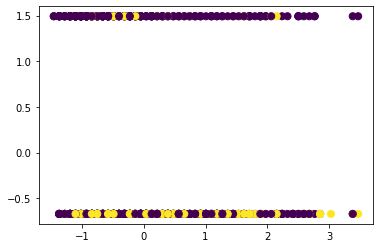

In [74]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=kmeans_y, s=50, cmap='viridis')

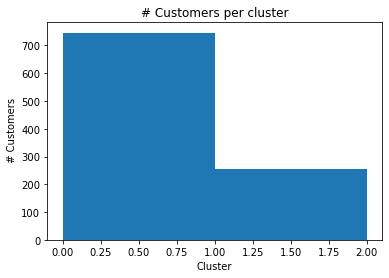

In [75]:
n_cluster = 2

plt.hist(kmeans_y, bins=range(n_cluster+1))
plt.title("# Customers per cluster")
plt.xlabel("Cluster")
plt.ylabel(" # Customers")
plt.show()

df['CLUSTER_INDEX'] = kmeans_y
df['CLUSTER_INDEX'] = kmeans_y

### Hierarchical 

In [76]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=2)
agg_result = agg_cluster.fit_predict(X_std)

In [77]:
print("The silhouette score of the Hierarchical solution: {}".format(metrics.silhouette_score(X_std, agg_result, metric='euclidean')))

The silhouette score of the Hierarchical solution: 0.1533489353048652


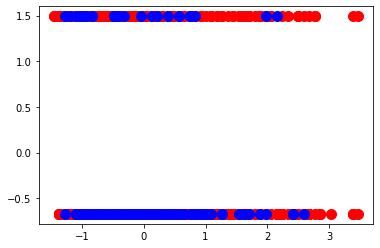

In [78]:
plt.scatter(X_std[agg_result==0, 0], X_std[agg_result==0, 1], s=100, c='red', label ='Cluster 1') 
plt.scatter(X_std[agg_result==1, 0], X_std[agg_result==1, 1], s=100, c='blue', label ='Cluster 2')

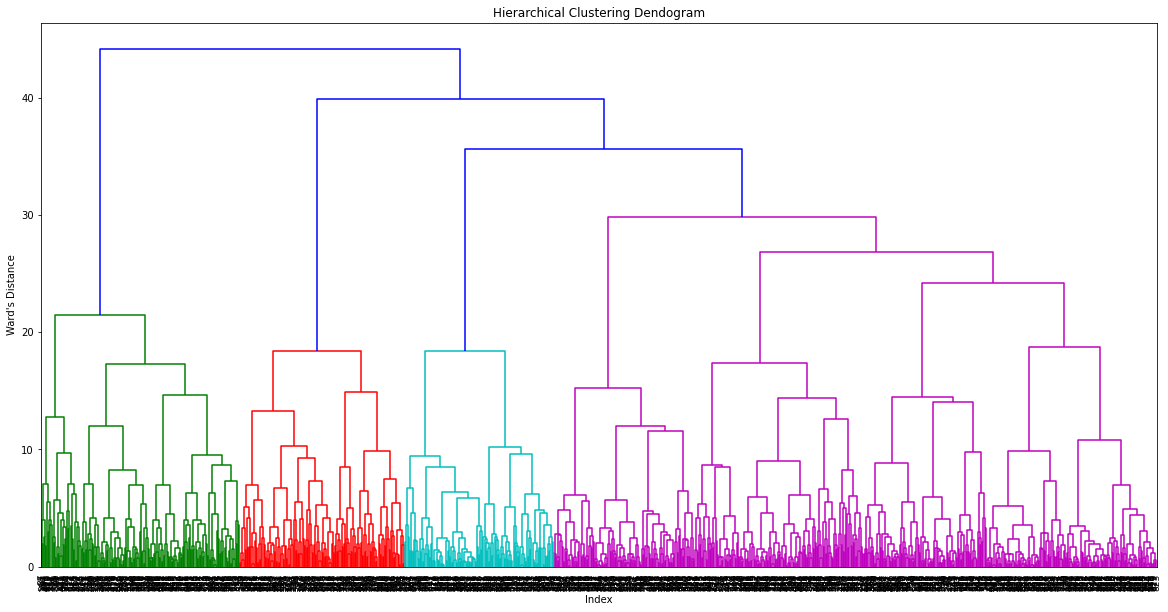

In [79]:
distance = linkage(X_std,'ward')


plt.figure(figsize=(20,10))
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("Index")
plt.ylabel("Ward's Distance")
dendrogram(distance, leaf_rotation=90, leaf_font_size=9);
plt.axhline(98, c='k')
plt.show()


### DBSCAN 

Find best parameters for DBSCAN

In [80]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_std)
distances, indices = nbrs.kneighbors(X_std)

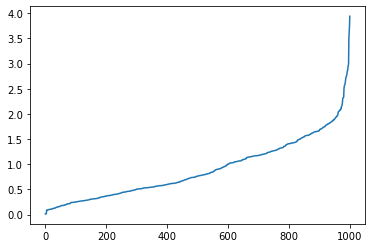

In [81]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

The optimal value for epsilon will be found at the point of maximum curvature, which here it's 2.

In [82]:
#define clustering
dbscan_cluster = DBSCAN(eps=.2, min_samples=1) 
#fit model
dbscan_result = dbscan_cluster.fit_predict(X_std)

In [83]:
print("The silhouette score of the DBSCAN solution: {}".format(metrics.silhouette_score(X_std, dbscan_result, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.04721746151639889


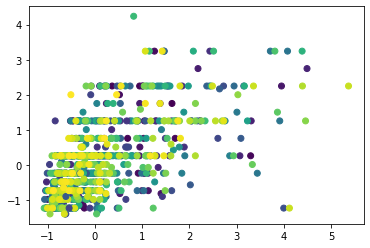

In [84]:
plt.scatter(X_std[:,6], X_std[:,7], c=dbscan_result)
plt.show()

### Perform t-SNE Dimensionality Reduction

In [85]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_std)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.081606
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.273605
[t-SNE] KL divergence after 300 iterations: 0.944777


### K-means with t-SNE

In [86]:
# Defining the k-means, using 2 clusters, fit and predict
kmeans_tsne = KMeans(n_clusters=2, random_state=123).fit_predict(tsne_results)

In [87]:
print("The silhouette score of the K-means with t-SNE solution: {}".format(metrics.silhouette_score(tsne_results, kmeans_tsne, metric='euclidean')))

The silhouette score of the K-means with t-SNE solution: 0.44100531935691833


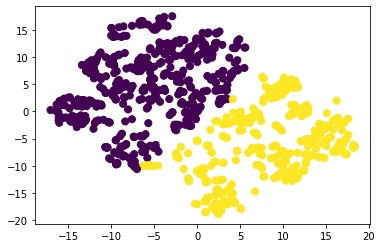

In [88]:
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmeans_tsne,
            s=50, cmap='viridis');

### Hierarchical with t-SNE

In [89]:
#fit and predict model
agg_tsne = agg_cluster.fit_predict(tsne_results)

In [90]:
print("The silhouette score of the Hierarchical with t-SNE solution: {}".format(metrics.silhouette_score(tsne_results, agg_tsne, metric='euclidean')))

The silhouette score of the Hierarchical with t-SNE solution: 0.4036257863044739


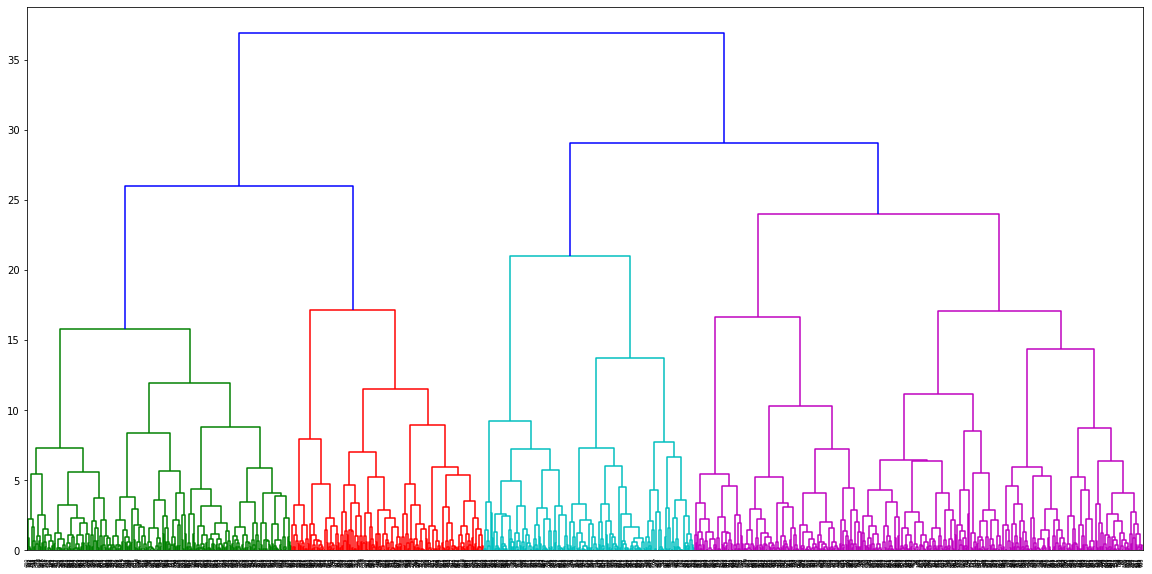

In [91]:
plt.figure(figsize=(20,10))
dendrogram(linkage(tsne_results, method='complete'))
plt.show()

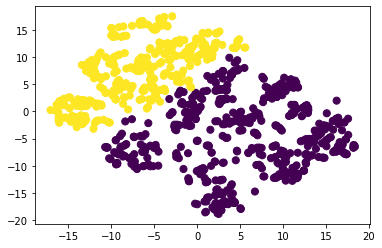

In [92]:
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=agg_tsne,
            s=50, cmap='viridis');

### DBSCAN with t-SNE

In [93]:
#fit model
clusters_tsne = dbscan_cluster.fit_predict(tsne_results)

In [94]:
print("The silhouette score of the DBSCAN with t-SNE solution: {}".format(metrics.silhouette_score(tsne_results, clusters_tsne, metric='euclidean')))

The silhouette score of the DBSCAN with t-SNE solution: 0.3552166521549225


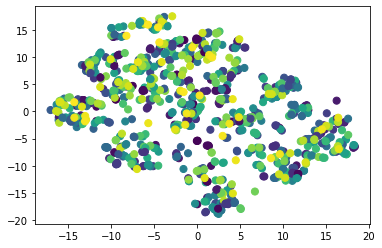

In [95]:
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters_tsne,
            s=50, cmap='viridis');

### Perform UMAP Dimensionality Reducation 

In [96]:
#define Umap clustering and fit model
umap_results = umap.UMAP(n_neighbors=2,  
                         min_dist=0.3,
                         metric='correlation').fit_transform(X_std)

### K-means with UMAP

In [97]:
# Define model
kmeans_umap = KMeans(n_clusters=2, random_state=123).fit_predict(umap_results)

In [98]:
print("The silhouette score of the K-means with UMAP solution: {}".format(metrics.silhouette_score(umap_results, kmeans_umap, metric='euclidean')))

The silhouette score of the K-means with UMAP solution: 0.3440003991127014


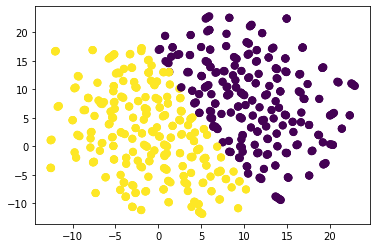

In [99]:
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=kmeans_umap,
            s=50, cmap='viridis')

### Hierarchical with UMAP

In [100]:
#fit and predict model
agg_clusters_umap = agg_cluster.fit_predict(umap_results)

In [101]:
print("The silhouette score of the Hierarchical with UMAP solution: {}".format(metrics.silhouette_score(umap_results, agg_clusters_umap, metric='euclidean')))

The silhouette score of the Hierarchical with UMAP solution: 0.3368225395679474


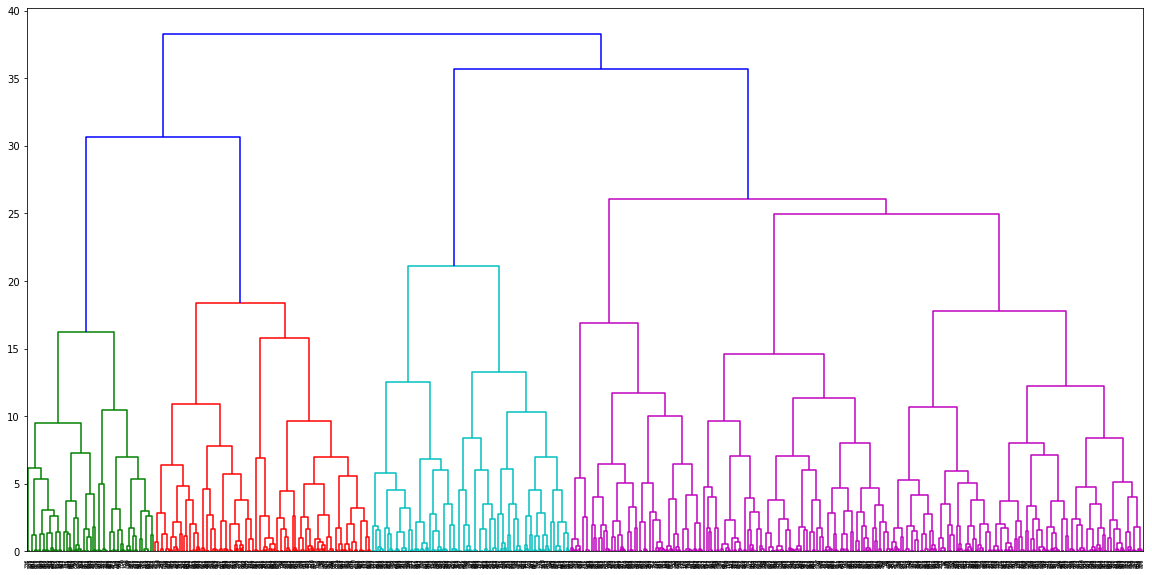

In [102]:
plt.figure(figsize=(20,10))
dendrogram(linkage(umap_results, method='complete'))
plt.show()

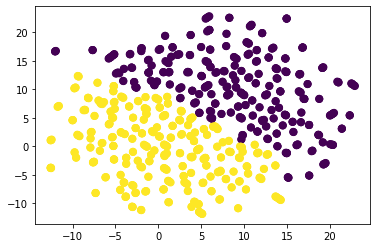

In [103]:
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=agg_clusters_umap,
            s=50, cmap='viridis')

### DBSCAN with UMAP

In [104]:
#fit and predict model
dbscan_umap = dbscan_cluster.fit_predict(umap_results)

In [105]:
print("The silhouette score of the DBSCAN with UMAP solution: {}".format(metrics.silhouette_score(umap_results, dbscan_umap, metric='euclidean')))

The silhouette score of the DBSCAN with UMAP solution: 0.9063400030136108


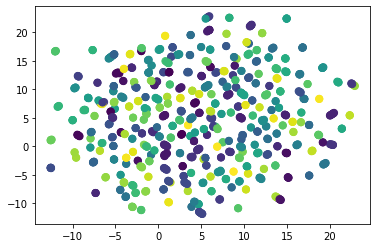

In [106]:
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=dbscan_umap,
            s=50, cmap='viridis')

### Perform PCA 

In [107]:
pca = PCA(n_components=2)
pca_labels = pca.fit_transform(X_std)

### K-means with PCA

In [108]:
# Define the k-means with umap using 4 from elbow method
kmeans_pca = KMeans(n_clusters=2, random_state=123).fit_predict(pca_labels)

In [109]:
print("The silhouette score of the K-means with PCA solution: {}".format(metrics.silhouette_score(pca_labels, kmeans_pca, metric='euclidean')))

The silhouette score of the K-means with PCA solution: 0.40266157248222023


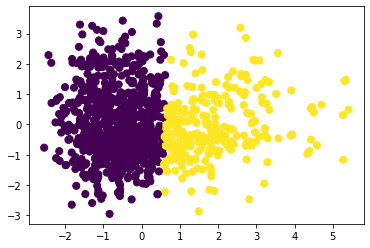

In [110]:
plt.scatter(pca_labels[:, 0], pca_labels[:, 1], c=kmeans_pca,
            s=50, cmap='viridis')

### Hierarchical with PCA

In [111]:
#fit and predict model
agg_pca = agg_cluster.fit_predict(pca_labels)

In [112]:
print("The silhouette score of the Hierarchical with PCA solution: {}".format(metrics.silhouette_score(pca_labels, agg_pca, metric='euclidean')))

The silhouette score of the Hierarchical with PCA solution: 0.3335113900466521


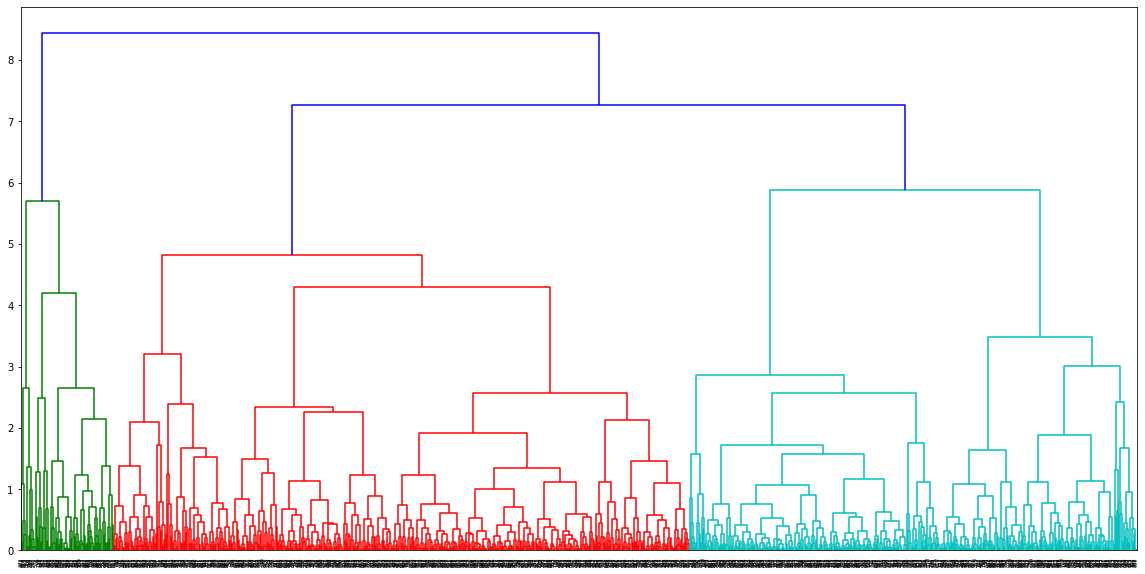

In [113]:
plt.figure(figsize=(20,10))
dendrogram(linkage(pca_labels, method='complete'))
plt.show()

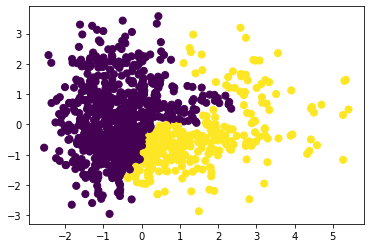

In [114]:
plt.scatter(pca_labels[:, 0], pca_labels[:, 1], c=agg_pca,
            s=50, cmap='viridis')

### DBSCAN with PCA

In [115]:
#fit and predict model
dbscan_pca = dbscan_cluster.fit_predict(pca_labels)

In [116]:
print("The silhouette score of the DBSCAN with PCA solution: {}".format(metrics.silhouette_score(pca_labels, dbscan_pca, metric='euclidean')))

The silhouette score of the DBSCAN with PCA solution: -0.2569658438283875


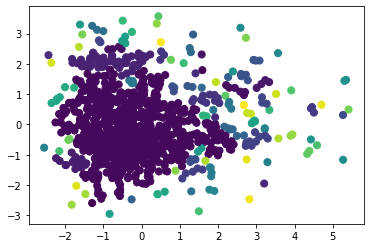

In [224]:
plt.scatter(pca_labels[:, 0], pca_labels[:, 1], c=dbscan_pca,
            s=50, cmap='viridis')

## COMPARISON

In [117]:
data = {'kmeans_sc':[0.171, 0.441, 0.344, 0.402],
        'hierarchical_sc': [0.153, 0.403, 0.336, 0.333],
        'DBSCAN_sc': [0.047, 0.355, .906, -0.257]}

df_comp = pd.DataFrame(data, columns = ['kmeans_sc','hierarchical_sc', 'DBSCAN_sc'], index=['No DR','t-SNE','UMAP','PCA'])
df_comp

,kmeans_sc,hierarchical_sc,DBSCAN_sc
No DR,0.171,0.153,0.047
t-SNE,0.441,0.403,0.355
UMAP,0.344,0.336,0.906
PCA,0.402,0.333,-0.257


Based on the comparison table, the best silhoutte scores show that k-means is the best clustering option and t-SNE being the best dimensionality reduction method.

### Pros and Cons of t-SNE
    t-SNE is a better tool to understand high-dimensional datasets. The 
    Bank Customer Segementation data doesn't necessarily qualify as such 
    because it only has 9 variables. 

    The method of t-SNE allows more hyperparamters tuning than the other 
    methods.
    
    Preserves only small pairwise distances or local similarities 

### Pros and Cons of K-Means 
    Assumes that clustering technique assumes that the data clusters    
    spherically and each cluster has equal numbers of observations.
    
    Good tool to use to segment data 
    
    Order of data is important and can impact results
    

### n_clusters
    The methods in the beginning showed that the best number of clusters 
    were either 2 or 3. Looking at the dataset description, I can 
    confidently say that the number of cluster at 2 is correct. The dataset 
    is used to classify whether a customer is classifed as good credit risk 
    or bad credit risk. 